In [13]:
import tensorflow as tf

In [14]:
from tensorflow.keras import layers
from tensorflow.keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(128, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))

In [15]:
from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
               metrics=['acc'])

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255 )

validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


In [17]:
train_generator = train_datagen.flow_from_directory(
'/content/drive/MyDrive/computer_vision/skin-cancer-malignant-vs-benign/data/train',
                                                      target_size=(150, 150),
                                                      batch_size=32,
                                                      class_mode='binary')
2355/32

Found 2355 images belonging to 2 classes.


73.59375

In [18]:
validation_generator = validation_datagen.flow_from_directory(
    '/content/drive/MyDrive/computer_vision/skin-cancer-malignant-vs-benign/data/test',
                                               target_size=(150,150),
                                               batch_size=32,
                                               class_mode="binary")
660/32

Found 660 images belonging to 2 classes.


20.625

In [19]:
history = model.fit_generator(
                              train_generator,
                              epochs=25,
                              validation_data=validation_generator,
                              validation_steps=21)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
74/74 [==============================] - 120s 2s/step - loss: 0.5681 - acc: 0.6841 - val_loss: 0.4803 - val_acc: 0.7864
Epoch 2/25
74/74 [==============================] - 119s 2s/step - loss: 0.4807 - acc: 0.7516 - val_loss: 0.4424 - val_acc: 0.7652
Epoch 3/25
74/74 [==============================] - 117s 2s/step - loss: 0.4517 - acc: 0.7741 - val_loss: 0.4139 - val_acc: 0.7848
Epoch 4/25
74/74 [==============================] - 113s 2s/step - loss: 0.4322 - acc: 0.7851 - val_loss: 0.7407 - val_acc: 0.6803
Epoch 5/25
74/74 [==============================] - 112s 2s/step - loss: 0.4139 - acc: 0.7958 - val_loss: 0.4486 - val_acc: 0.7348
Epoch 6/25
74/74 [==============================] - 112s 2s/step - loss: 0.3957 - acc: 0.8051 - val_loss: 0.3742 - val_acc: 0.8288
Epoch 7/25
74/74 [==============================] - 112s 2s/step - loss: 0.3894 - acc: 0.8051 - val_loss: 0.4084 - val_acc: 0.8030
Epoch 8/25
74/74 [==============================] - 112s 2s/step - loss: 0.3772 - a

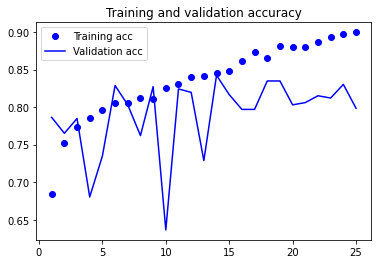

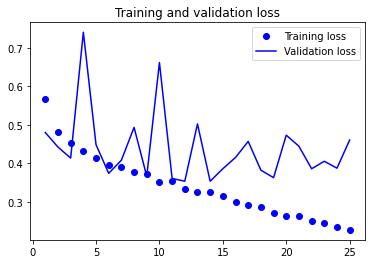

In [20]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
model.save('skin-cancer-malignant-vs-benign.h5')

#Instantiating the VGG16 convolutional base

In [22]:
from tensorflow.keras.applications import VGG16
conv_base = VGG16(weights='imagenet',
                                   include_top=False,
                                   input_shape=(150, 150, 3))

58900480/58889256 [==============================] - 0s 0us/step


In [25]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [26]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [27]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
base_dir       = "/content/drive/MyDrive/computer_vision/skin-cancer-malignant-vs-benign/data"
train_dir      = "/content/drive/MyDrive/computer_vision/skin-cancer-malignant-vs-benign/data/train"
validation_dir = "/content/drive/MyDrive/computer_vision/skin-cancer-malignant-vs-benign/data/test"
#test_dir       = "/content/drive/MyDrive/cat and dog/test"

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 30

def extract_features(directory, sample_count):   
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    
    generator = datagen.flow_from_directory(
                                       directory,
                                       target_size=(150, 150),
                                       batch_size=batch_size,
                                       class_mode='binary')

    i=0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
        
            break
    return features, labels

In [28]:
train_features, train_labels = extract_features(train_dir, 2355)
validation_features, validation_labels = extract_features(validation_dir, 660)

Found 2355 images belonging to 2 classes.
Found 660 images belonging to 2 classes.


In [30]:
train_features = np.reshape(train_features, (2355, 4*4* 512))
validation_features = np.reshape(validation_features, (660, 4*4* 512))

In [33]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

In [34]:
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
                                            loss='binary_crossentropy',
                                             metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [35]:
history = model.fit(train_features, train_labels,
                        epochs=30,batch_size=30,
                    validation_data=(validation_features, validation_labels))


Epoch 1/30
79/79 [==============================] - 2s 26ms/step - loss: 0.6533 - acc: 0.6293 - val_loss: 0.5463 - val_acc: 0.7091
Epoch 2/30
79/79 [==============================] - 2s 24ms/step - loss: 0.5231 - acc: 0.7397 - val_loss: 0.4742 - val_acc: 0.7773
Epoch 3/30
79/79 [==============================] - 2s 24ms/step - loss: 0.4556 - acc: 0.7932 - val_loss: 0.4428 - val_acc: 0.7803
Epoch 4/30
79/79 [==============================] - 2s 24ms/step - loss: 0.4155 - acc: 0.8055 - val_loss: 0.4411 - val_acc: 0.7818
Epoch 5/30
79/79 [==============================] - 2s 24ms/step - loss: 0.3947 - acc: 0.8238 - val_loss: 0.4246 - val_acc: 0.7848
Epoch 6/30
79/79 [==============================] - 2s 23ms/step - loss: 0.3796 - acc: 0.8285 - val_loss: 0.4315 - val_acc: 0.7909
Epoch 7/30
79/79 [==============================] - 2s 23ms/step - loss: 0.3706 - acc: 0.8301 - val_loss: 0.4028 - val_acc: 0.8045
Epoch 8/30
79/79 [==============================] - 2s 24ms/step - loss: 0.3639 - a

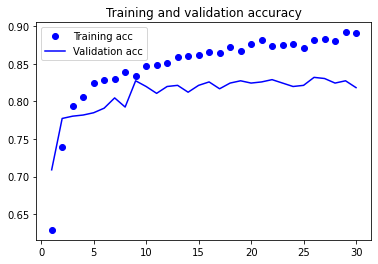

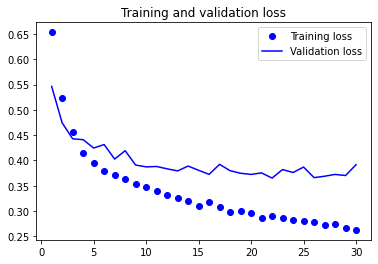

In [36]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# FEATURE EXTRACTION WITH DATA AUGMENTATION

In [3]:
from tensorflow.keras.applications import VGG16
conv_base = VGG16(weights='imagenet',
                                   include_top=False,
                                   input_shape=(150, 150, 3))

58900480/58889256 [==============================] - 1s 0us/step


In [4]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [7]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

#base_dir       = "/content/drive/MyDrive/cat and dog"
train_dir      = "/content/drive/MyDrive/computer_vision/skin-cancer-malignant-vs-benign/data/train"
validation_dir = "/content/drive/MyDrive/computer_vision/skin-cancer-malignant-vs-benign/data/test"
#test_dir       = "/content/drive/MyDrive/cat and dog/test"

train_datagen = ImageDataGenerator(
                                  rescale=1./255,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)
 
train_generator = train_datagen.flow_from_directory(
                                          train_dir,
                                          target_size=(150, 150),
                                          batch_size=40,
                                          class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
                                          validation_dir,
                                          target_size=(150, 150),
                                          batch_size=40,
                                          class_mode='binary')


Found 2355 images belonging to 2 classes.
Found 660 images belonging to 2 classes.


In [13]:
#2355/40
660/40

16.5

In [14]:
from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=2e-5),
                                                 metrics=['acc'])


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [15]:
history = model.fit_generator(
                           train_generator,steps_per_epoch=59,
                            epochs=20,
                            validation_data=validation_generator,
                            validation_steps=17)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
59/59 [==============================] - 1407s 23s/step - loss: 0.4704 - acc: 0.7703 - val_loss: 0.4132 - val_acc: 0.8197
Epoch 2/20
59/59 [==============================] - 36s 600ms/step - loss: 0.3840 - acc: 0.8204 - val_loss: 0.3523 - val_acc: 0.8485
Epoch 3/20
59/59 [==============================] - 36s 605ms/step - loss: 0.3401 - acc: 0.8433 - val_loss: 0.3110 - val_acc: 0.8500
Epoch 4/20
59/59 [==============================] - 36s 608ms/step - loss: 0.3194 - acc: 0.8561 - val_loss: 0.3883 - val_acc: 0.8258
Epoch 5/20
59/59 [==============================] - 36s 609ms/step - loss: 0.2951 - acc: 0.8650 - val_loss: 0.3030 - val_acc: 0.8576
Epoch 6/20
59/59 [==============================] - 36s 607ms/step - loss: 0.2911 - acc: 0.8675 - val_loss: 0.2889 - val_acc: 0.8742
Epoch 7/20
59/59 [==============================] - 36s 607ms/step - loss: 0.2720 - acc: 0.8692 - val_loss: 0.3194 - val_acc: 0.8485
Epoch 8/20
59/59 [==============================] - 36s 608ms/step - 

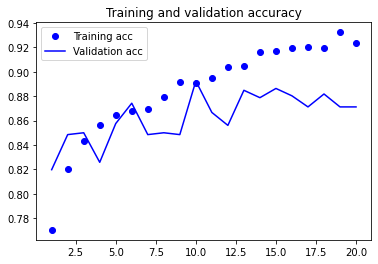

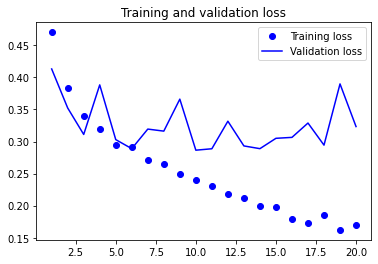

In [16]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [17]:
model.save('skin-cancer-malignant-vs-benign.h5')   

#Fine-tuning

In [30]:
conv_base.summary()


Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [31]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':

      set_trainable = True
      if set_trainable:
        layer.trainable = True
      else:
        layer.trainable = False

In [32]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [33]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

#base_dir       = "/content/drive/MyDrive/cat and dog"
train_dir      = "/content/drive/MyDrive/computer_vision/skin-cancer-malignant-vs-benign/data/train"
validation_dir = "/content/drive/MyDrive/computer_vision/skin-cancer-malignant-vs-benign/data/test"
#test_dir       = "/content/drive/MyDrive/cat and dog/test"

train_datagen = ImageDataGenerator(
                                  rescale=1./255,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)
 
train_generator = train_datagen.flow_from_directory(
                                          train_dir,
                                          target_size=(150, 150),
                                          batch_size=40,
                                          class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
                                          validation_dir,
                                          target_size=(150, 150),
                                          batch_size=40,
                                          class_mode='binary')


Found 2355 images belonging to 2 classes.
Found 660 images belonging to 2 classes.


In [35]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=1e-5),metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [36]:
history = model.fit_generator(
train_generator,
steps_per_epoch=59,
epochs=30,
validation_data=validation_generator,
validation_steps=17)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
59/59 [==============================] - 38s 604ms/step - loss: 0.2459 - acc: 0.8794 - val_loss: 0.2802 - val_acc: 0.8818
Epoch 2/30
59/59 [==============================] - 36s 602ms/step - loss: 0.1567 - acc: 0.9342 - val_loss: 0.3046 - val_acc: 0.8879
Epoch 3/30
59/59 [==============================] - 36s 604ms/step - loss: 0.1493 - acc: 0.9401 - val_loss: 0.3260 - val_acc: 0.8697
Epoch 4/30
59/59 [==============================] - 36s 604ms/step - loss: 0.1320 - acc: 0.9452 - val_loss: 0.4962 - val_acc: 0.8742
Epoch 5/30
59/59 [==============================] - 36s 604ms/step - loss: 0.1271 - acc: 0.9456 - val_loss: 0.4113 - val_acc: 0.8712
Epoch 6/30
59/59 [==============================] - 36s 605ms/step - loss: 0.1139 - acc: 0.9537 - val_loss: 0.3604 - val_acc: 0.8955
Epoch 7/30
59/59 [==============================] - 36s 605ms/step - loss: 0.1159 - acc: 0.9567 - val_loss: 0.3942 - val_acc: 0.8909
Epoch 8/30
59/59 [==============================] - 36s 605ms/step - 

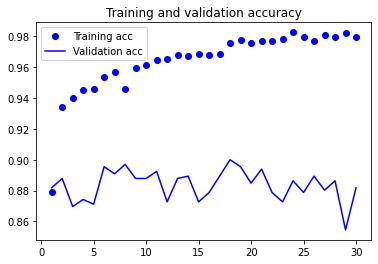

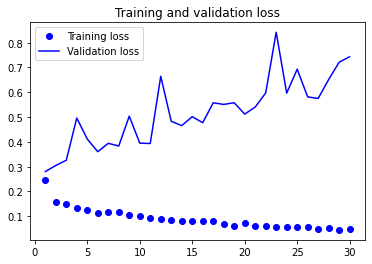

In [37]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

#Smoothing the plots

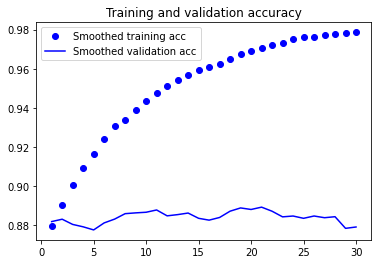

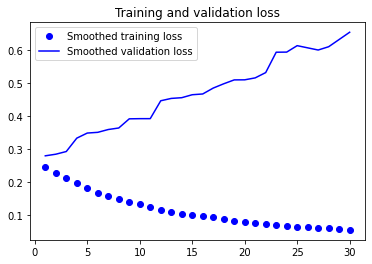

In [40]:
def smooth_curve(points, factor=0.8):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

plt.plot(epochs,smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [41]:
model.save('skin-cancer-malignant-vs-benign.h5')